In [1]:
#
# Working through the example at 
# https://github.com/salvadorgarciamunoz/kipet/blob/master/kipet/examples/Ex_1_ode_sim.py
#
# Currently this works with pyomo 5.6.9 and pyUtilib 5.8.0 (doesn't work with pyomo 5.7)

In [2]:
from kipet.library.TemplateBuilder import *
from kipet.library.PyomoSimulator import *

import matplotlib.pyplot as plt
import sys

In [3]:
#=========================================================================
#USER INPUT SECTION - REQUIRED MODEL BUILDING ACTIONS
#=========================================================================
    
# Create Template model (Section 4.2.1 of documentation)
builder = TemplateBuilder()  
    
#First we define the components present in the mixture
builder.add_mixture_component('A',0.1)
builder.add_mixture_component('B',0.0)
builder.add_mixture_component('C',0.0)
    
#Following this we add the kinetic parameters
builder.add_parameter('k1',2.0)
builder.add_parameter('k2',0.2)
    
# define explicit system of ODEs
def rule_odes(m,t):
    exprs = dict()
    exprs['A'] = -m.P['k1']*m.Z[t,'A']
    exprs['B'] = m.P['k1']*m.Z[t,'A']-m.P['k2']*m.Z[t,'B']
    exprs['C'] = m.P['k2']*m.Z[t,'B']
    return exprs

#Add these ODEs to our model template
builder.set_odes_rule(rule_odes)

In [4]:
# create an instance of a pyomo model template
# the template includes
#      - Z variables indexed over time and components names e.g. m.Z[t,'A']
#      - P parameters indexed over the parameter names e.g. m.P['k']
# The arguments here are the start and end time of the simulation
pyomo_model = builder.create_pyomo_model(0.0, 10.0)

In [5]:
#=========================================================================
# USER INPUT SECTION - SPECIFIC USE SECTION
#=========================================================================
# Since in this example we wish to simulate the reaction system defined above,
# we call the PyomoSimulator class as described in Section 4.2.2 of the documentation
     
# create instance of simulator with the created pyomo_model as input
simulator = PyomoSimulator(pyomo_model)

In [6]:
# Then we define the discrete points wanted in the concentration profile and 
# define our discretization scheme and which collocation roots to deploy
# further details and advice is included in Section 4.2.2 of the documentation
simulator.apply_discretization('dae.collocation', ncp = 2, nfe = 30, scheme = 'LAGRANGE-RADAU')

# Finally we can define our results and run the simulation
results_pyomo = simulator.run_sim('ipopt',tee=True)

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     1143
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:      363
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total

Text(0.5, 1.0, 'Concentration Profile')

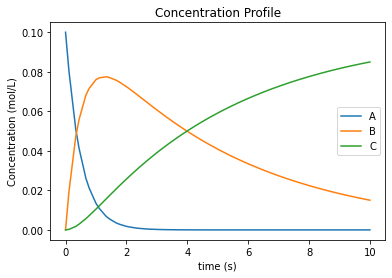

In [7]:
results_pyomo.Z.plot.line(legend=True)
plt.xlabel("time (s)")
plt.ylabel("Concentration (mol/L)")
plt.title("Concentration Profile")